# python数据分析与挖掘实战第三章-数据预处理

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import lagrange #导入拉格朗日插值函数


In [2]:
import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
os.getcwd()

'C:\\Users\\hey'

In [4]:
os.chdir('E:/Jupyterspace')

In [15]:
catering_sale = 'catering_sale.xls'

In [20]:
data = pd.read_excel(catering_sale,index_col = u'日期')

## 基本统计量

In [21]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


## 查看离群值箱线图

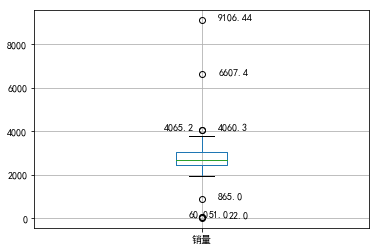

In [19]:
plt.figure() #建立图像
p = data.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

#用annotate添加注释
#其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
#以下参数都是经过调试的，需要具体问题具体调试。
for i in range(len(x)): 
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图

In [22]:
data = data[(data[u'销量'] > 400)&(data[u'销量'] < 5000)] # 过滤异常数据

## 其他统计量

In [23]:
statistics = data.describe() #保存基本统计量
statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数间距
print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


## 2/8贡献度分析-帕累托图

In [58]:
data = pd.read_excel(dish_profit)
data.sort_values(by=u'盈利', ascending=False, na_position='first')
data

,菜品ID,菜品名,盈利
0,17148,A1,9173
1,17154,A2,5729
2,109,A3,4811
3,117,A4,3594
4,17151,A5,3195
5,14,A6,3026
6,2868,A7,2378
7,397,A8,1970
8,88,A9,1877
9,426,A10,1782


In [59]:
dish_profit = 'catering_dish_profit.xls' # 餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = u'菜品名')
data = data[u'盈利'].copy()
data.sort_values(ascending=False)
data

菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64

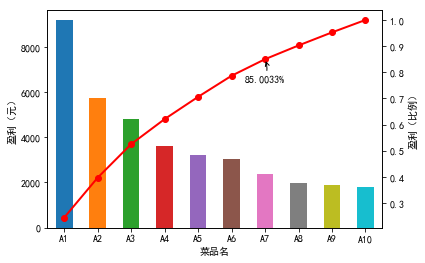

In [60]:
plt.figure()
data.plot(kind='bar')
plt.ylabel(u'盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）')
plt.show()

## 相关系数corr()

In [64]:
catering_sale = 'catering_sale_all.xls' #餐饮数据，含有其他属性
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列
data.corr() #相关系数矩阵，即给出了任意两款菜式之间的相关系数

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [65]:
data.corr()[u'百合酱蒸凤爪'] #只显示“百合酱蒸凤爪”与其他菜式的相关系数

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [66]:
data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺']) #计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数

0.009205803051836475

## 图形

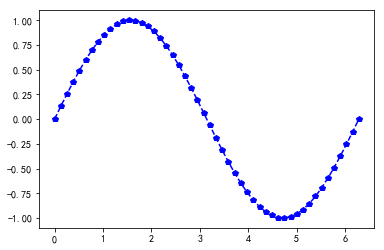

In [69]:
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
plt.Figure(figsize=(7,5)) 
plt.plot(x,y,'bp--')
plt.show()

## 插值

In [10]:
inputfile = 'catering_sale.xls' #销量数据路径
outputfile = 'sales.xls' #输出数据路径

data = pd.read_excel(inputfile) #读入数据
data[u'销量'][(data[u'销量'] < 400) | (data[u'销量'] > 5000)] = None #过滤异常值，将其变为空值

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
data.head()

,日期,销量
0,2015-03-01,NaN
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [7]:
#注意：该插值方法插入了负值

#自定义列向量插值函数
#s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s, n, k=5):
  y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数
  y = y[y.notnull()] #剔除空值
  return lagrange(y.index, list(y))(n) #插值并返回插值结果

#逐个元素判断是否需要插值
for i in data.columns:
  for j in range(len(data)):
    if (data[i].isnull())[j]: #如果为空即插值。
      data[i][j] = ployinterp_column(data[i], j)
data.to_excel(outputfile) #输出结果，写入文件

D:\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## 数据规范化

In [14]:
datafile = 'normalization_data.xls' #参数初始化
data = pd.read_excel(datafile, header = None) #读取数据

In [15]:
data.describe()

,0,1,2,3
count,7.000000,7.000000,7.000000,7.000000
mean,117.571429,200.428571,405.714286,1712.571429
std,43.706815,504.151385,422.546137,1441.371090
min,69.000000,-600.000000,-521.000000,-1283.000000
25%,86.500000,-27.000000,451.500000,1552.500000
50%,101.000000,413.000000,470.000000,2245.000000
75%,145.000000,524.000000,646.500000,2529.000000
max,190.000000,596.000000,695.000000,2863.000000


In [20]:
data_range = (data - data.min())/(data.max() - data.min()) #最小-最大规范化

In [21]:
data_range.describe()

,0,1,2,3
count,7.000000,7.000000,7.000000,7.000000
mean,0.401417,0.669255,0.762101,0.722521
std,0.361213,0.421531,0.347489,0.347653
min,0.000000,0.000000,0.000000,0.000000
25%,0.144628,0.479097,0.799753,0.683912
50%,0.264463,0.846990,0.814967,0.850941
75%,0.628099,0.939799,0.960115,0.919440
max,1.000000,1.000000,1.000000,1.000000


In [24]:
data_zero = (data - data.mean())/data.std() #零-均值规范化

In [25]:
data_zero

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [26]:
#小数定标规范化:通过移动小数位数，将属性值映射到[-1，1]之间 x_new = x/10^k
data/10**np.ceil(np.log10(data.abs().max())) 

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


## 数据离散化 

In [27]:
datafile = 'discretization_data.xls' #参数初始化
data = pd.read_excel(datafile) #读取数据
data = data[u'肝气郁结证型系数'].copy()

In [28]:
#等宽离散化，各个类比依次命名为0,1,2,3
k = 4
d1 = pd.cut(data, k, labels = range(k))

In [33]:
#等频率离散化
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles = w)[4:4+k+1] #使用describe函数自动计算分位数
w[0] = w[0]*(1-1e-10)
d2 = pd.cut(data, w, labels = range(k))

In [41]:
w

0%      0.02600
25%     0.17625
50%     0.23100
75%     0.28175
100%    0.50400
Name: 肝气郁结证型系数, dtype: float64

In [43]:
#基于k-means聚类的方法
from sklearn.cluster import KMeans #引入KMeans
kmodel = KMeans(n_clusters = k, n_jobs = 4) #建立模型，n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data.reshape((len(data), 1))) #训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0) #输出聚类中心，并且排序（默认是随机序的）
w = pd.rolling_mean(c, 2).iloc[1:] #相邻两项求中点，作为边界点
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  


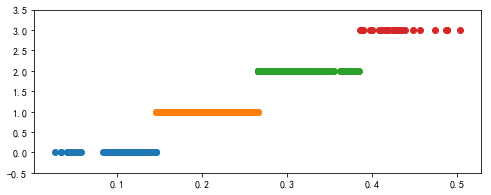

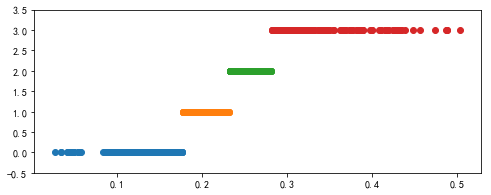

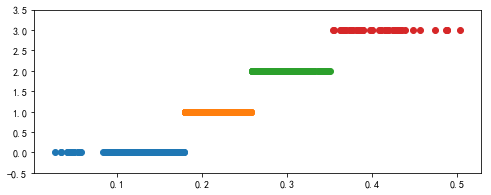

In [44]:
def cluster_plot(d, k): #自定义作图函数来显示聚类结果
  plt.figure(figsize = (8, 3))
  for j in range(0, k):
    plt.plot(data[d==j], [j for i in d[d==j]], 'o')
  
  plt.ylim(-0.5, k-0.5)
  return plt

cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()

In [53]:
#参数初始化
inputfile= 'electricity_data.xls' #供入供出电量数据
outputfile = 'electricity_data.xls' #属性构造后数据文件

data = pd.read_excel(inputfile) #读入数据
data[u'线损率'] = (data[u'供入电量'] - data[u'供出电量'])/data[u'供入电量']

# data.to_excel(outputfile, index = False) #保存结果

In [56]:
data

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


## pca 

In [58]:
#参数初始化
inputfile = 'principal_component.xls'
outputfile = 'dimention_reducted.xls' #降维后的数据

data = pd.read_excel(inputfile, header = None) #读入数据

# sklearn.decomposition.PCA(n-components = None,copy = True,whiten=False)
# n-components需要保留的因子数，默认全部保留，copy是否保留原数据不变，whiten白化，使得每个特征具有相同方差
from sklearn.decomposition import PCA

pca = PCA() #默认全部保留
pca.fit(data)
pca.components_ #返回模型的各个特征向量

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
        -0.10681901,  0.63233277,  0.04720838],
       [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
         0.52280144,  0.31167833,  0.0754221 ],
       [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
         0.18985251, -0.69902952,  0.04505823],
       [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
        -0.34598258, -0.02090066,  0.02137393]])

In [59]:
pca.explained_variance_ratio_ #返回各个成分各自的方差百分比，值越大权重越大

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

In [61]:
# 根据方差百分比，选取前三个
pca = PCA(3) #选取前三个
pca.fit(data)
low_d = pca.transform(data) # 选取前三个
pd.DataFrame(low_d).to_excel(outputfile) # 保存数据
pca.inverse_transform(low_d) # 复原数据

array([[41.81945026, 17.92938537,  7.42743613,  6.38423781,  7.51911186,
         7.95581778,  1.89450158, 22.64634237],
       [26.03033486,  8.31048339, 11.0923029 , 10.50941053, 13.73592734,
        19.29219354,  1.55616178, 10.69991334],
       [12.8912027 ,  4.7200299 ,  4.15574756,  3.88084002,  4.15590258,
         5.95354081,  0.63142514,  3.10031979],
       [21.95107023,  7.86983692,  5.61296149,  5.00363184,  5.46598715,
         7.32692984,  1.00043437,  6.90279388],
       [33.2494621 , 16.9295226 ,  6.97070109,  6.54184048,  8.78799069,
         9.47854775,  1.76803069, 25.48379317],
       [35.30223656, 14.31635159, 16.19611986, 15.83211443, 22.51688172,
        30.25654088,  2.46591519, 25.94480913],
       [22.0404299 ,  7.67212745,  9.96458085,  9.59042702, 12.69748404,
        17.7402549 ,  1.39886681, 10.62704002],
       [47.82344306, 16.03581175, 11.11907058,  9.5362307 , 11.08119152,
        14.24461981,  2.12478649, 16.79265084],
       [40.72333307, 17.98533192